In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['heart.csv', 'Heart_disease_prediction (3).ipynb']


## II. Importing and understanding our dataset 

In [3]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1


#### Description

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [12]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [15]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

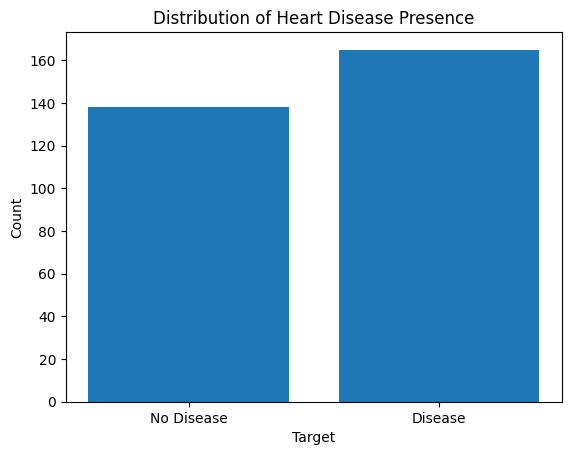

In [16]:
target_counts = dataset['target'].value_counts()

# Plot the distribution
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Presence')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

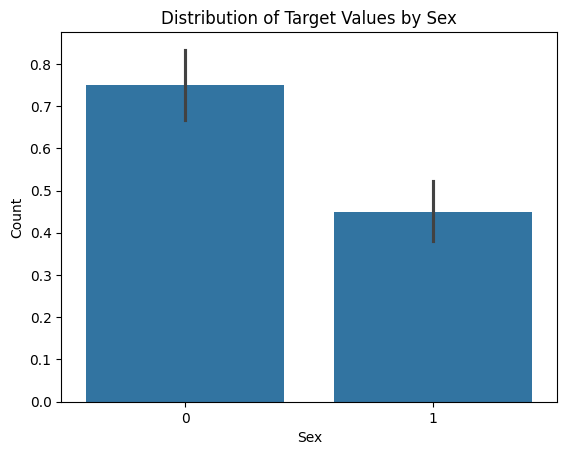

In [18]:
sns.barplot(x=dataset["sex"], y=dataset["target"])
plt.title("Distribution of Target Values by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

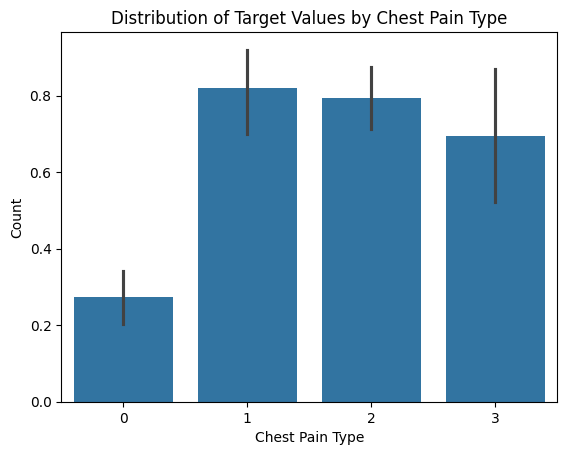

In [20]:
sns.barplot(x=dataset["cp"], y=dataset["target"])
plt.title("Distribution of Target Values by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

### Analysing the restecg feature

In [23]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

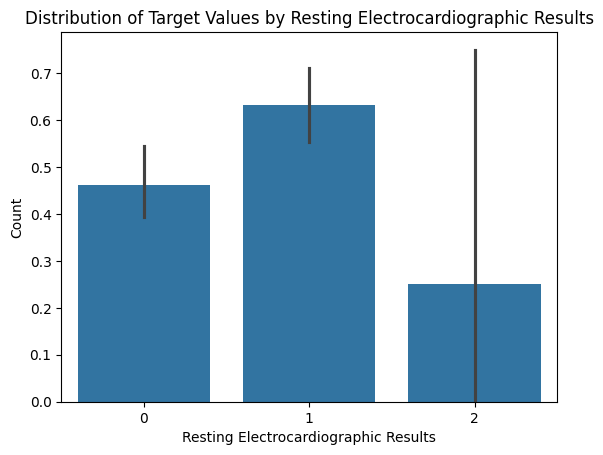

In [24]:
sns.barplot(x=dataset["restecg"], y=dataset["target"])
plt.title("Distribution of Target Values by Resting Electrocardiographic Results")
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Count")
plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [25]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

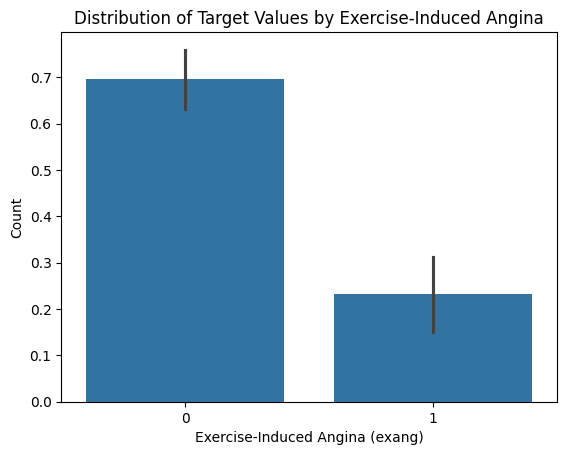

In [26]:
sns.barplot(x=dataset["exang"], y=dataset["target"])
plt.title("Distribution of Target Values by Exercise-Induced Angina")
plt.xlabel("Exercise-Induced Angina (exang)")
plt.ylabel("Count")
plt.show()

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [27]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

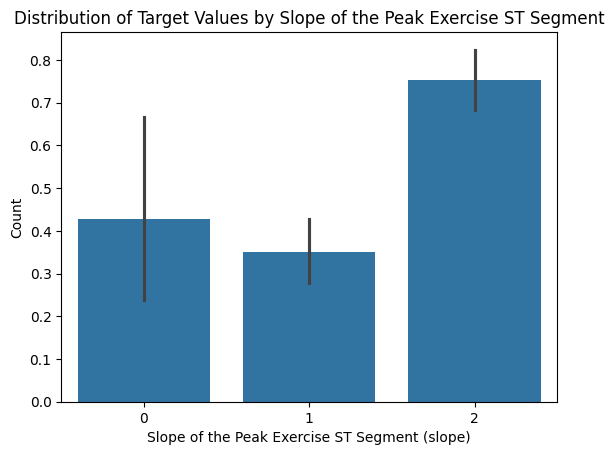

In [28]:
sns.barplot(x=dataset["slope"], y=dataset["target"])
plt.title("Distribution of Target Values by Slope of the Peak Exercise ST Segment")
plt.xlabel("Slope of the Peak Exercise ST Segment (slope)")
plt.ylabel("Count")
plt.show()

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [29]:
#number of major vessels (0-3) colored by flourosopy

In [30]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

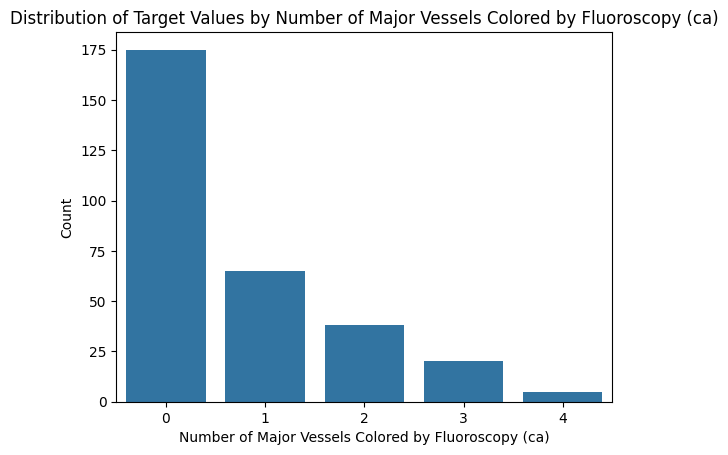

In [31]:
sns.countplot(x=dataset["ca"])
plt.title("Distribution of Target Values by Number of Major Vessels Colored by Fluoroscopy (ca)")
plt.xlabel("Number of Major Vessels Colored by Fluoroscopy (ca)")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='ca', ylabel='target'>

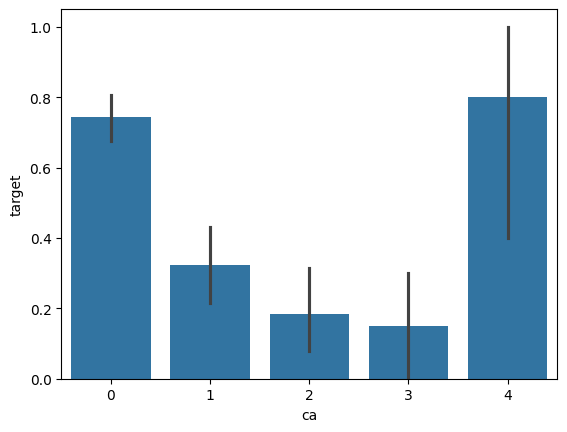

In [32]:
sns.barplot(x=dataset["ca"], y=dataset["target"])

##### ca=4 has astonishingly large number of heart patients

In [33]:
### Analysing the 'thal' feature

In [34]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

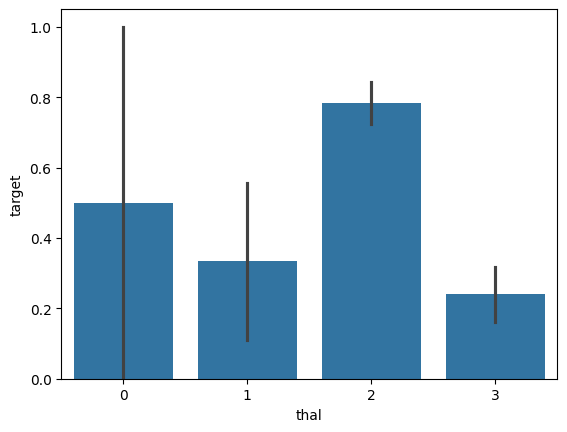

In [35]:
sns.barplot(x=dataset["thal"], y=dataset["target"])

<Axes: xlabel='thal', ylabel='Density'>

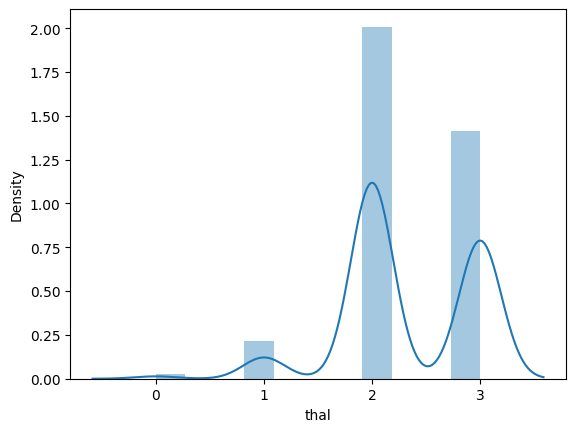

In [36]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [37]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [38]:
X_train.shape

(242, 13)

In [39]:
X_test.shape

(61, 13)

In [40]:
Y_train.shape

(242,)

In [41]:
Y_test.shape

(61,)

## V. Model Fitting

In [42]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [44]:
Y_pred_lr.shape

(61,)

In [45]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [47]:
Y_pred_nb.shape

(61,)

In [48]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [50]:
Y_pred_knn.shape

(61,)

In [51]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [53]:
print(Y_pred_dt.shape)

(61,)


In [54]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0

# Search in a smaller range but with more granularity
for x in range(1, 101, 5):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
    
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

print("Best Random State:", best_x)
print("Max Accuracy:", max_accuracy)





Best Random State: 11
Max Accuracy: 88.52


In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)


In [57]:
Y_pred_rf.shape

(61,)

In [58]:
from sklearn.metrics import accuracy_score

score_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
print("The accuracy score achieved using Random Forest is:", str(score_rf) + "%")


The accuracy score achieved using Random Forest is: 88.52%


## VI. Output final score

In [75]:
scores = [score_lr, score_nb, score_knn, score_dt, score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: " + str(scores[i]) + " %")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %


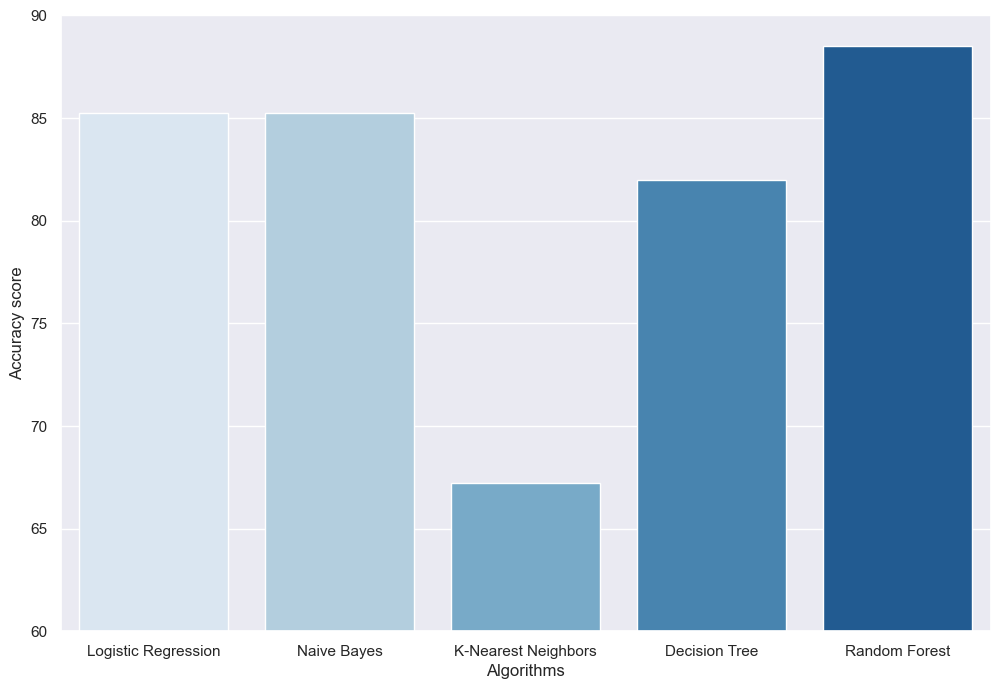

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Create the barplot
sns.barplot(x=algorithms, y=scores, palette="Blues")

# Set y-axis limits
plt.ylim(60, 90)

plt.show()


In [81]:
#No disease
#input_data = (62,0,0,140,268,0,0,160,0,5.8,0,2,2)

#Disease
#input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

import tkinter as tk
from tkinter import ttk
import numpy as np

# Assuming rf is already defined as your trained RandomForestClassifier

# Function to predict heart disease
def predict_heart_disease():
    # Extract values from the input fields
    input_values = [entry.get() for entry in entries]
    
    try:
        # Convert values to respective data types
        input_values = [int(input_values[0]), int(input_values[1]), int(input_values[2]), int(input_values[3]), 
                        int(input_values[4]), int(input_values[5]), int(input_values[6]), int(input_values[7]), 
                        int(input_values[8]), float(input_values[9]), int(input_values[10]), int(input_values[11]), 
                        int(input_values[12])]
        
        # Create input data as numpy array
        input_data = np.asarray(input_values)
        input_data_reshaped = input_data.reshape(1, -1)

        # Predict
        prediction = rf.predict(input_data_reshaped)

        # Update result label
        if prediction[0] == 0:
            result_label.config(text='The Person does not have a Heart Disease', foreground='green')
        else:
            result_label.config(text='The Person has Heart Disease', foreground='red')
            
    except ValueError:
        result_label.config(text='Please enter valid values', foreground='red')

# Create main window
root = tk.Tk()
root.title('Heart Disease Prediction')

# Create input fields
labels = ["Age:", "Sex:", "Chest Pain Type:", "Resting BP:", "Cholesterol:", "Fasting Blood Sugar:", 
          "Resting ECG:", "Max HR:", "Exercise Angina:", "Old Peak:", "Slope:", "CA:", "Thal:"]
entries = []

for i, label in enumerate(labels):
    ttk.Label(root, text=label).grid(row=i, column=0, padx=10, pady=5)
    entry = ttk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Create submit button
submit_button = ttk.Button(root, text='Submit', command=predict_heart_disease)
submit_button.grid(row=len(labels), columnspan=2, padx=10, pady=10)

# Create result label
result_label = ttk.Label(root, text='', foreground='black')
result_label.grid(row=len(labels) + 1, columnspan=2, padx=10, pady=10)

root.mainloop()
